**Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Amazon) using the past 60-day stock price.**




In [20]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Prepare dataset

In [21]:
# Get the stock quote
df = pd.read_csv('D:\workplace\ML\stock_price_prediction\Amazon.csv')

# Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/15/1997,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,5/16/1997,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,5/19/1997,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,5/20/1997,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,5/21/1997,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
6150,10/21/2021,3414.250000,3440.280029,3403.000000,3435.010010,3435.010010,1881400
6151,10/22/2021,3421.000000,3429.840088,3331.300049,3335.550049,3335.550049,3133800
6152,10/25/2021,3335.000000,3347.800049,3297.699951,3320.370117,3320.370117,2226000
6153,10/26/2021,3349.510010,3416.120117,3343.979980,3376.070068,3376.070068,2693700


In [22]:
# Convert from strings to Pandas datetime objects
df['Date'] = pd.to_datetime(df['Date'])
# Set the 'Date' column into the index column
df = df.set_index('Date')

In [23]:
# In this datafram, I just use the 'Close' column to predict
# Split the dataframe into 3 datasets : training (60%), validation (20%), test(20%)
train, validation, test = np.split(df.filter(['Close']), [int(.6*len(df)), int(.8*len(df))])

In [24]:
# Get the shape of the datasets
print(train.shape)
print(validation.shape)
print(test.shape)

(3693, 1)
(1231, 1)
(1231, 1)


In [25]:
# Show the data
train

,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083
...,...
2012-01-10,179.339996
2012-01-11,178.899994
2012-01-12,175.929993


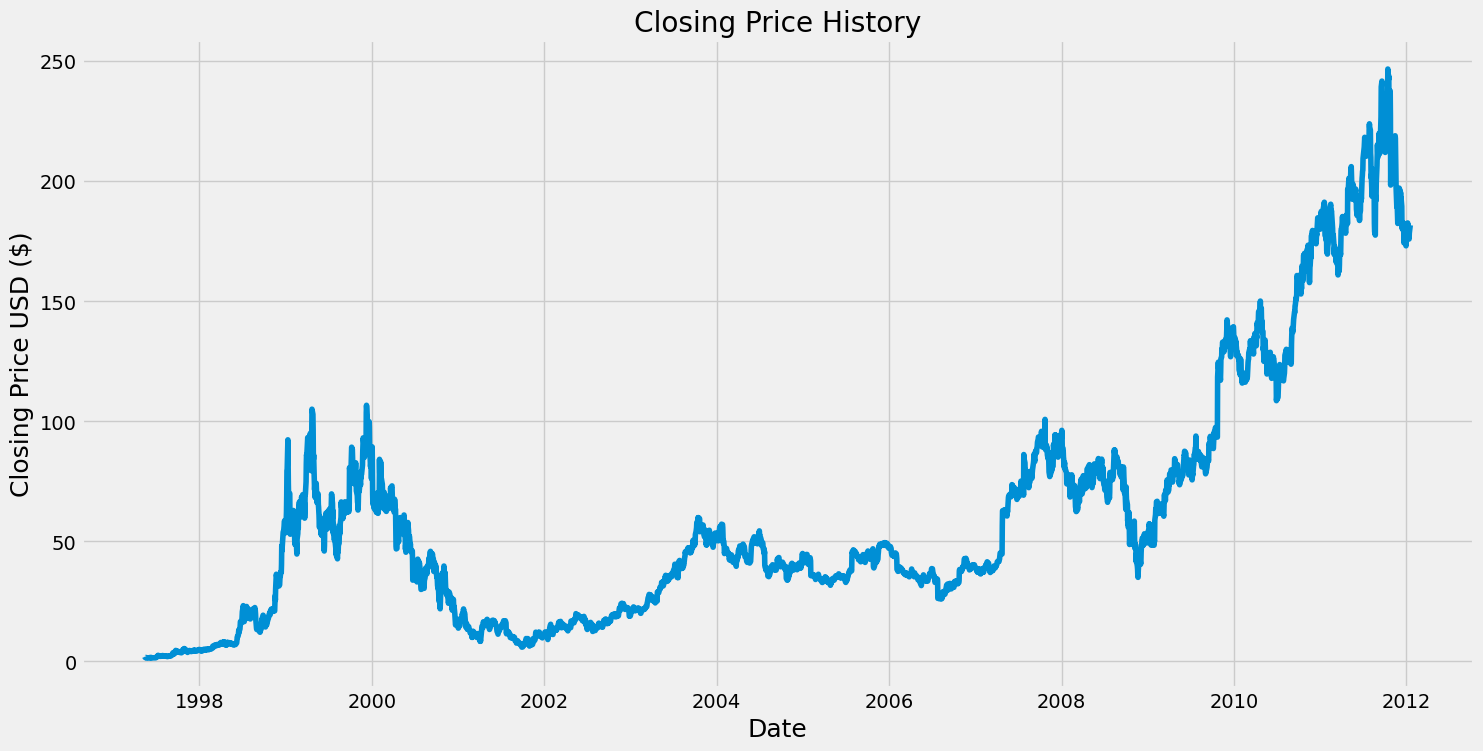

In [26]:
# Visualize the close price history (train dataset)
plt.figure(figsize = (16,8))
plt.title('Closing Price History')
plt.plot(train['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price USD ($)', fontsize = 18)
plt.show()

In [27]:
# Scaling the data with MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_data = scaler.fit_transform(train)

# Show the data
train_data

array([[0.00229298],
       [0.0013588 ],
       [0.00127388],
       ...,
       [0.71147198],
       [0.72162225],
       [0.73482982]])

In [28]:
# Split training dataset into x_train and y_train
x_train = []
y_train = []

for i in range(60,len(train)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])

In [29]:
# Convert x_train and y_train into numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train dataset since the input of LSTM model need a 3D matrix (number of samples, number of time steps, number of feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

(3633, 60, 1)
(3633, 1)


# Build and training model

In [30]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [31]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [32]:
# Train the model
model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
114/114 [==============================] - 5s 20ms/step - loss: 0.0034
Epoch 2/20
114/114 [==============================] - 2s 19ms/step - loss: 4.6132e-04
Epoch 3/20
114/114 [==============================] - 2s 20ms/step - loss: 4.4448e-04
Epoch 4/20
114/114 [==============================] - 2s 19ms/step - loss: 3.8335e-04
Epoch 5/20
114/114 [==============================] - 2s 20ms/step - loss: 3.6539e-04
Epoch 6/20
 55/114 [=============>................] - ETA: 1s - loss: 3.2789e-04

KeyboardInterrupt: 

# Validate the model

In [ ]:
# Scaling the validation dataset with MinMaxScaler
validation_data = scaler.fit_transform(validation)

# Split validation dataset into x_valid and y_valid
x_valid = []
y_valid = []

for i in range(60,len(validation)):
    x_valid.append(validation_data[i-60:i])
    y_valid.append(validation_data[i])

In [ ]:
# Convert x_valid and y_valid into numpy arrays
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

# Reshape the x_valid dataset since the input of LSTM model need a 3D matrix (number of samples, number of time steps, number of feature)
x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))
x_valid.shape

(1171, 60, 1)

In [ ]:
# Get the models predicted price values
predictions = model.predict(x_valid)

37/37 [==============================] - 1s 11ms/step


In [ ]:
# Convert the predictions and y_valid dataset into the real values for visualizing
predictions = scaler.inverse_transform(predictions)
y_valid = scaler.inverse_transform(y_valid)

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(y_valid - predictions)**2 )
rmse

1.7023291286385498

<ipython-input-24-c7e01fba2c0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Validation'] = y_valid
<ipython-input-24-c7e01fba2c0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


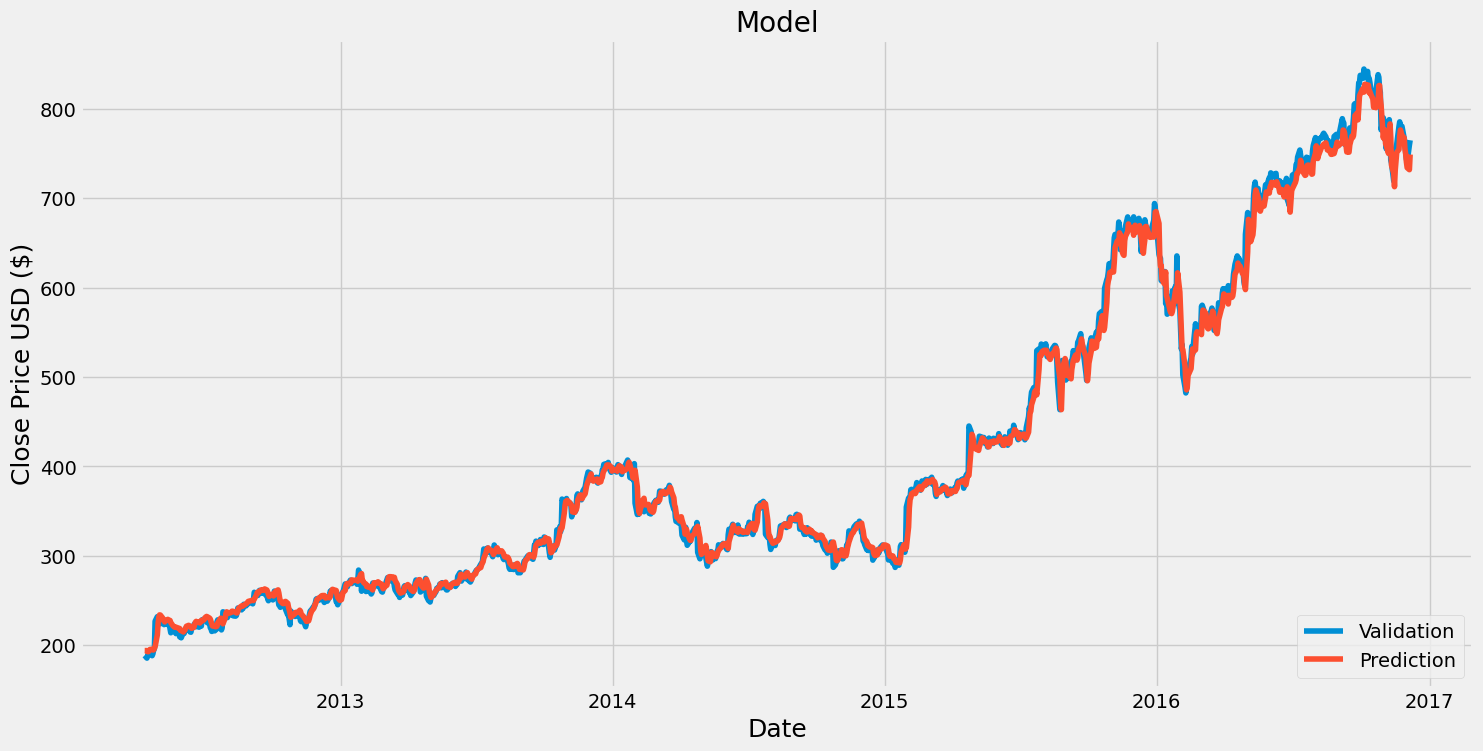

In [ ]:
# Plot the data
valid = validation[60:]
valid['Validation'] = y_valid
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(valid[['Validation','Predictions']])
plt.legend(['Validation', 'Prediction'], loc = 'lower right')
plt.show()


In [ ]:
# Show the valid and predicted prices
valid.drop(columns = 'Close')

,Validation,Predictions
Date,,
2012-04-13,188.460007,193.936874
2012-04-16,185.500000,193.892868
2012-04-17,188.389999,192.683182
2012-04-18,191.070007,192.725632
2012-04-19,191.100006,194.053864
...,...,...
2016-11-30,750.570007,749.544250
2016-12-01,743.650024,740.318298
2016-12-02,740.340027,734.012268


# Test the model

In [ ]:
# Scaling the test dataset with MinMaxScaler
test_data = scaler.fit_transform(test)

# Split validation dataset into x_test and y_test
x_test = []
y_test = []

for i in range(60,len(test)):
    x_test.append(test_data[i-60:i])
    y_test.append(test_data[i])

In [ ]:
# Convert x_test and y_valid into numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

# Reshape the x_valid dataset since the input of LSTM model need a 3D matrix (number of samples, number of time steps, number of feature)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(1171, 60, 1)

In [ ]:
# Get the models predicted price values
predictions = model.predict(x_test)

37/37 [==============================] - 0s 11ms/step


In [ ]:
# Convert the predictions and y_valid dataset into the real values for visualizing
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(y_test - predictions)**2 )
rmse

13.9521694285233

<ipython-input-31-9e61de704603>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Validation'] = y_test
<ipython-input-31-9e61de704603>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


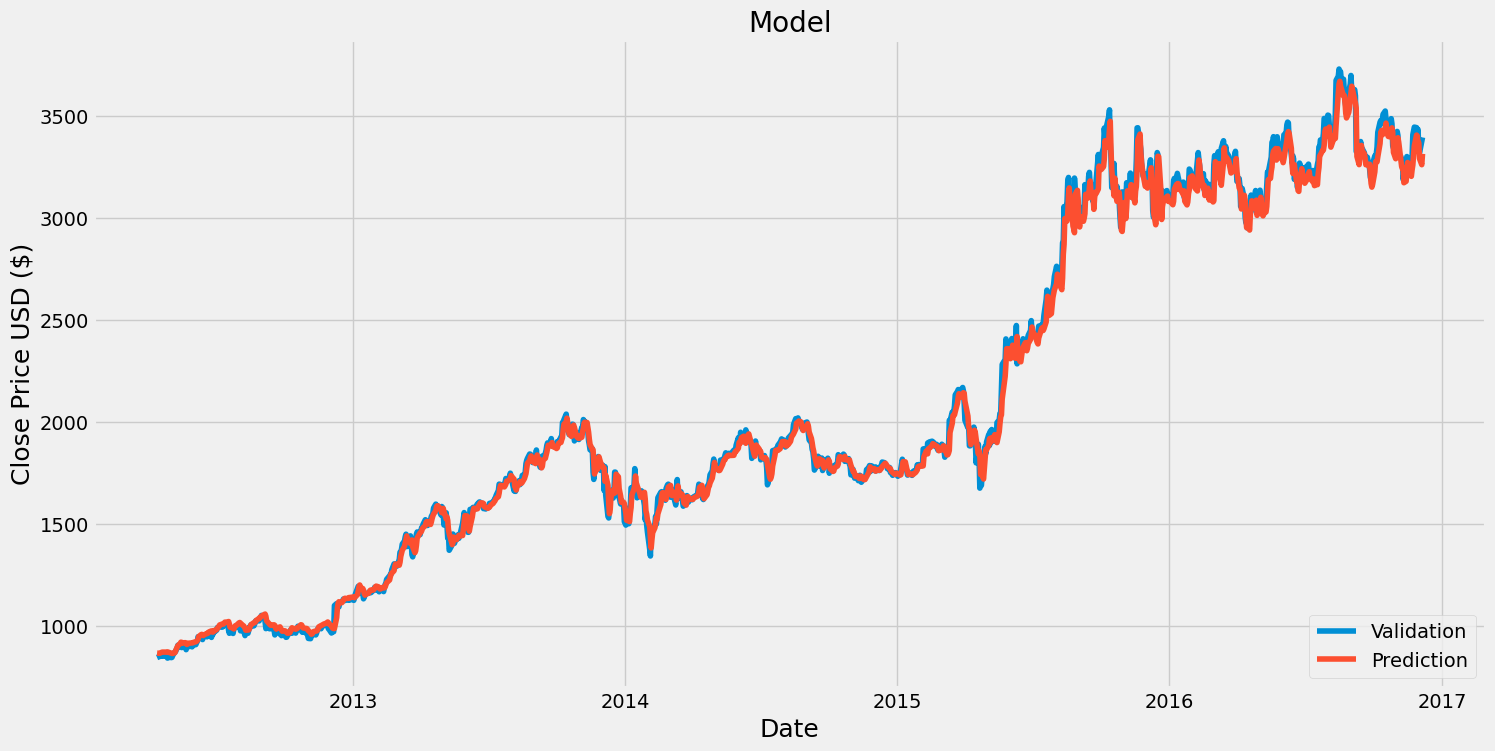

In [ ]:
# Plot the data
valid = validation[60:]
valid['Validation'] = y_test
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(valid[['Validation','Predictions']])
plt.legend(['Validation', 'Prediction'], loc = 'lower right')
plt.show()


In [ ]:
valid.drop(columns = 'Close')

,Validation,Predictions
Date,,
2012-04-13,846.020020,867.945374
2012-04-16,850.500000,866.828491
2012-04-17,853.000000,867.840271
2012-04-18,852.460022,869.950684
2012-04-19,854.590027,871.313049
...,...,...
2016-11-30,3435.010010,3364.993408
2016-12-01,3335.550049,3370.050293
2016-12-02,3320.370117,3291.771484
